# Harris Corner Detection

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

%matplotlib inline

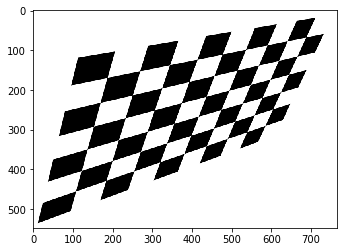

In [2]:
img = cv.imread('images/skewed_chessboard.png', cv.IMREAD_COLOR)

plt.imshow(img)
plt.show()

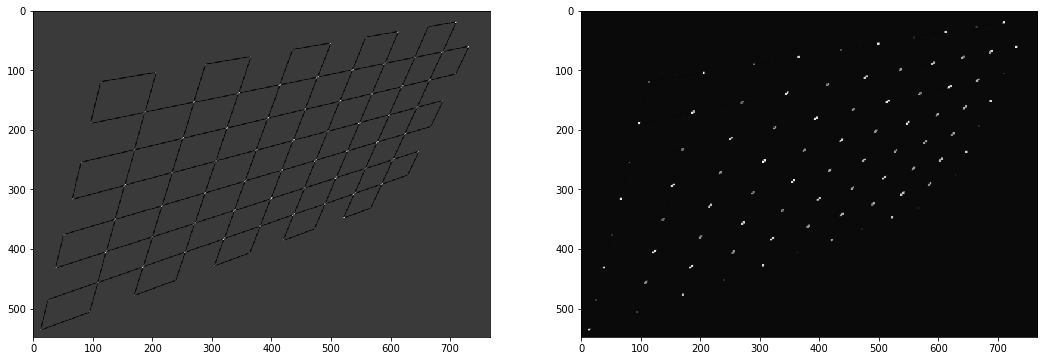

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

# blockSize Neighborhood size
# ksize Aperture parameter for the Sobel operator
# k Harris detector free parameter. See the formula above
harris = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.03)

# dilate corner points to enhance corner points
dst = cv.dilate(harris, None)

plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.imshow(harris, cmap='gray')
plt.subplot(122)
plt.imshow(dst, cmap='gray')
plt.show()

## Visualize corners

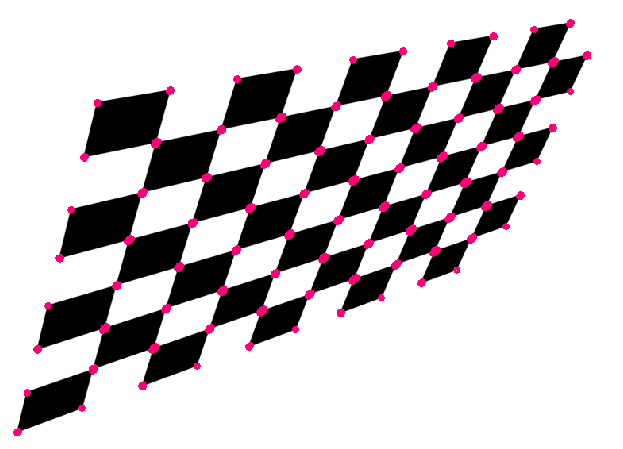

In [4]:
# threshold for an optimal value, it may vary depending on the image.
thresh = 0.05 * dst.max()

# obtain coordinates of corner elements (if they passed the threshold)
corners = np.argwhere(dst >= thresh)

# create an image copy to draw corners on
img_corners = np.copy(img)

# iterate through all the corners and draw them on the image 
for [y, x] in corners:
    # image, center pt, radius, color, thickness
    cv.circle(img_corners, (x, y), 3, (255, 0, 120), 1)

plt.figure(figsize=(14, 8))
plt.axis('off')
plt.imshow(img_corners)
plt.show()

## Visualize corners (slow, directly intuitive approach)

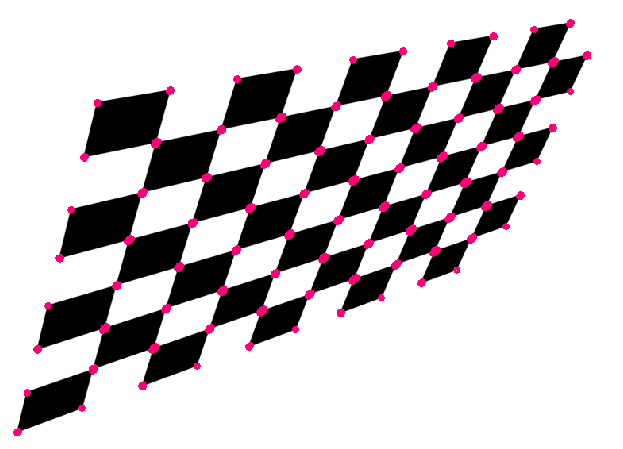

In [5]:
# threshold for an optimal value, it may vary depending on the image.
thresh = 0.05 * dst.max()

# create an image copy to draw corners on
corner_image = np.copy(img)

height, width = dst.shape[:2]

# iterate through all the corners and draw them on the image (if they pass the threshold)
for h in range(height):
    for w in range(width):
        if(dst[h, w] > thresh):
            # image, center pt, radius, color, thickness
            cv.circle(corner_image, (w, h), 3, (255, 0, 120), 1)

plt.figure(figsize=(14, 8))
plt.axis('off')
plt.imshow(corner_image)
plt.show()